Import package

In [1]:
import package_.preprocessing as preprocessing
import package_.featureSelection as featureSelection
import package_.classifier as classifier
import package_.ensemble as ensemble
import package_.performanceMetrics as performanceMetrics

Preprocessing

In [2]:
pr = preprocessing.DataPreprocessing()
pr.load_data('test_data/exampleData_TCGA_LUAD_2000.csv')
pr.show_data()

All columns are numeric
   class       SFTPC      SLC6A4      CLDN18        AGER       ITLN2  \
0      0  1956543357  1194806369  1431426819    15756623  9202700052   
1      0  1882400352  1212759862  1410754294  1466652971  7496015673   
2      0   185419824   117178896  1350193883  1493867899  8440654097   
3      0  1883454212  8590519685  1413681776  1401127311  7259752678   
4      0   189885652  1090221599  1382853275  1586313843  9767982962   

         LGI3    C13orf36      FAM83A       FABP4  ...        NEXN  \
0  1104918265   781892276  4642643817  1200926661  ...  9059098627   
1  1095692946   599455936  4397002003  1340728849  ...  8334597771   
2   974068509  7331127442  1885183866  1395746318  ...  9298702299   
3  1083758008  4755827619  3122490507   850509221  ...    72414951   
4  1135184185  9122156047  5235413063  1081828059  ...  9521703289   

       RASSF8        NKD1     PLEKHH2        EDN2       WDR86      CHRNB4  \
0  9661630615  7501576879  9103011571  295309

In [3]:
X, y = pr.set_target('class')

In [4]:
pr.standardization()

Feature Selection

lasso

In [5]:
lasso_features = featureSelection.FeatureSelection(X, y, 'lasso', 100)

In [6]:
lasso_features.show_features()

['SFTPC', 'SLC6A4', 'CLDN18', 'AGER', 'ITLN2', 'LGI3', 'C13orf36', 'FAM83A', 'FABP4', 'HBA1']


In [7]:
lasso_features = lasso_features.get_features()

relieff

In [8]:
relieff_features = featureSelection.FeatureSelection(X, y, 'relieff', 100)

In [9]:
relieff_features.show_features()

['CELA2B', 'OR6K3', 'CCL14-CCL15', 'MAGEA2', 'PDX1', 'CHRM2', 'TFAP2D', 'SPHKAP', 'OTC', 'HOTAIR']


In [10]:
relieff_features = relieff_features.get_features()

mrmr

In [11]:
mrmr_features = featureSelection.FeatureSelection(X, y, 'mrmr', 100)

100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


In [12]:
mrmr_features.show_features()

['PAICS', 'ANGPT4', 'GOLM1', 'SH3GL3', 'HTR3C', 'OR6K3', 'MYOC', 'CELA2B', 'MDK', 'OVCH1']


In [13]:
mrmr_features = mrmr_features.get_features()

uTest

In [14]:
uTest_features = featureSelection.FeatureSelection(X, y, 'uTest', 100)

In [15]:
uTest_features.show_features()

['LRRTM4', 'TRIM46', 'PABPC1L', 'CD79A', 'GIPC2', 'NTN4', 'XKRX', 'SVEP1', 'GPR109B', 'DPYSL2']


In [16]:
uTest_features = uTest_features.get_features()

Classifier

lasso

In [17]:
clf_lasso = classifier.Classifier(X, y, features=lasso_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [18]:
pm_lasso = performanceMetrics.PerformanceMetrics(clf_lasso)
pm_lasso.all_metrics()

["ACC: {'adaboost': 0.9912885662431942, 'gradient_boosting': 0.9790986085904414, 'random_forest': 0.9878100423472473, 'k_neighbors': 0.9912280701754386, 'decision_tree': 0.9808227465214759, 'extra_trees': 0.9930127041742285, 'svm': 0.8972171808832424, 'xgb': 0.9878100423472473}"]

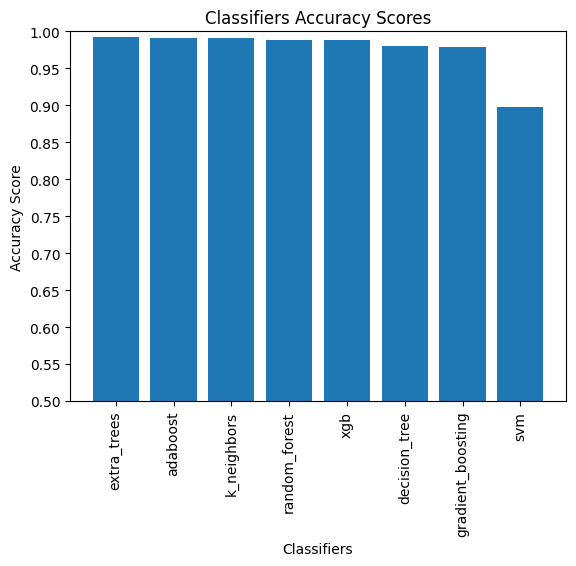

extra_trees: 0.9930127041742285
adaboost: 0.9912885662431942
k_neighbors: 0.9912280701754386
random_forest: 0.9878100423472473
xgb: 0.9878100423472473
decision_tree: 0.9808227465214759
gradient_boosting: 0.9790986085904414
svm: 0.8972171808832424


In [19]:
pm_lasso.plot_classifier_acc()

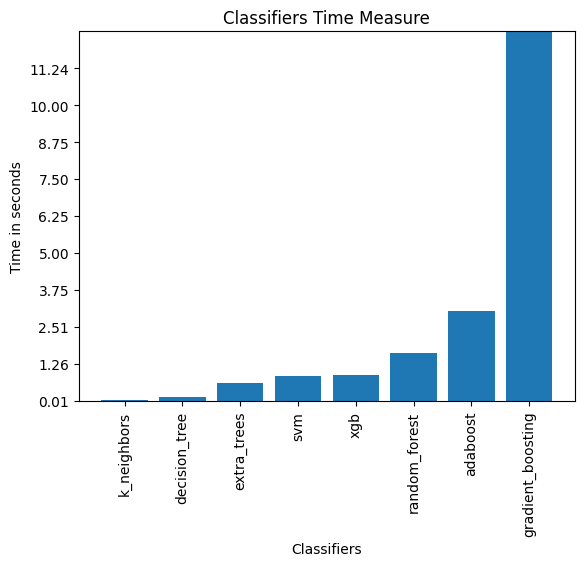

k_neighbors: 0.0410921573638916
decision_tree: 0.13057303428649902
extra_trees: 0.6092820167541504
svm: 0.8429973125457764
xgb: 0.8779711723327637
random_forest: 1.623133659362793
adaboost: 3.042616367340088
gradient_boosting: 12.4822998046875


In [20]:
pm_lasso.plot_classifier_time()

relieff

In [21]:
clf_relieff = classifier.Classifier(X, y, features=relieff_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [22]:
pm_relieff = performanceMetrics.PerformanceMetrics(clf_relieff)
pm_relieff.all_metrics()

["ACC: {'adaboost': 0.989503932244404, 'gradient_boosting': 0.9754990925589837, 'random_forest': 0.9877495462794919, 'k_neighbors': 0.9859951603145797, 'decision_tree': 0.9563520871143375, 'extra_trees': 0.9877495462794919, 'svm': 0.8972171808832424, 'xgb': 0.9825166364186328}"]

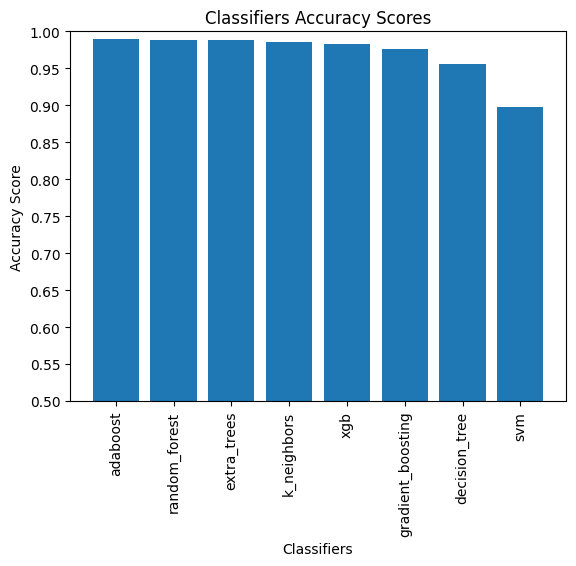

adaboost: 0.989503932244404
random_forest: 0.9877495462794919
extra_trees: 0.9877495462794919
k_neighbors: 0.9859951603145797
xgb: 0.9825166364186328
gradient_boosting: 0.9754990925589837
decision_tree: 0.9563520871143375
svm: 0.8972171808832424


In [23]:
pm_relieff.plot_classifier_acc()

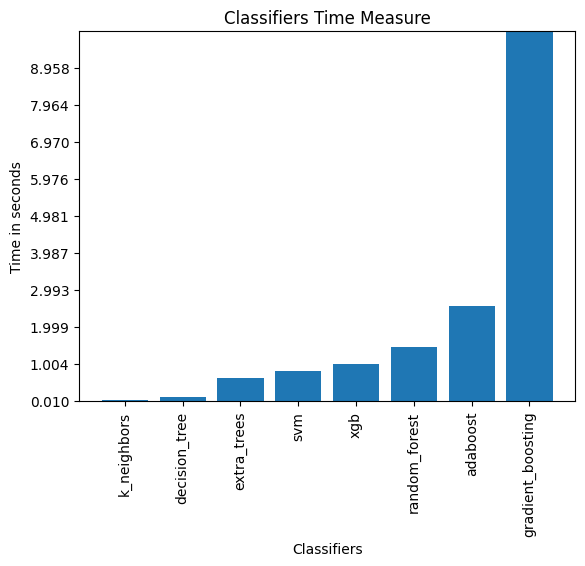

k_neighbors: 0.04080915451049805
decision_tree: 0.1278543472290039
extra_trees: 0.6196188926696777
svm: 0.8278555870056152
xgb: 1.0038104057312012
random_forest: 1.4710121154785156
adaboost: 2.5613009929656982
gradient_boosting: 9.942702770233154


In [24]:
pm_relieff.plot_classifier_time()

mrmr

In [25]:
clf_mrmr = classifier.Classifier(X, y, features=mrmr_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [26]:
pm_mrmr = performanceMetrics.PerformanceMetrics(clf_mrmr)
pm_mrmr.all_metrics()

["ACC: {'adaboost': 0.9912885662431942, 'gradient_boosting': 0.9704174228675135, 'random_forest': 0.9877495462794919, 'k_neighbors': 0.989503932244404, 'decision_tree': 0.9686327888687236, 'extra_trees': 0.9947670901391408, 'svm': 0.8972171808832424, 'xgb': 0.9895341802782818}"]

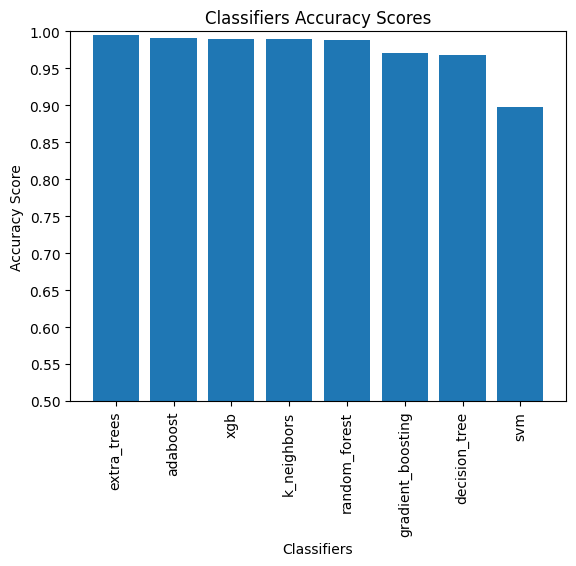

extra_trees: 0.9947670901391408
adaboost: 0.9912885662431942
xgb: 0.9895341802782818
k_neighbors: 0.989503932244404
random_forest: 0.9877495462794919
gradient_boosting: 0.9704174228675135
decision_tree: 0.9686327888687236
svm: 0.8972171808832424


In [27]:
pm_mrmr.plot_classifier_acc()

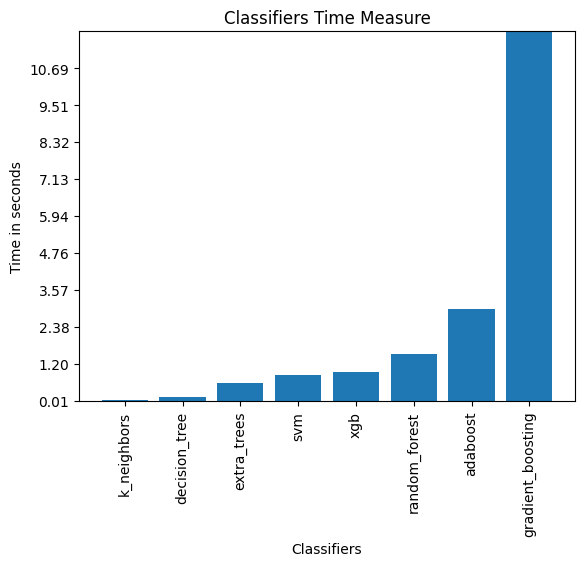

k_neighbors: 0.04287147521972656
decision_tree: 0.1283421516418457
extra_trees: 0.5908451080322266
svm: 0.8410544395446777
xgb: 0.9354090690612793
random_forest: 1.523425817489624
adaboost: 2.9482834339141846
gradient_boosting: 11.869585990905762


In [28]:
pm_mrmr.plot_classifier_time()

uTest

In [29]:
clf_uTest = classifier.Classifier(X, y, features=uTest_features, classifiers=['all'], cross_validation='stratified_k_fold', fold=10)

In [30]:
pm_uTest = performanceMetrics.PerformanceMetrics(clf_uTest)
pm_uTest.all_metrics()

["ACC: {'adaboost': 0.9878100423472473, 'gradient_boosting': 0.9860556563823352, 'random_forest': 0.9895644283121596, 'k_neighbors': 0.9825166364186328, 'decision_tree': 0.9878100423472473, 'extra_trees': 0.9860556563823353, 'svm': 0.8972171808832424, 'xgb': 0.9912583182093162}"]

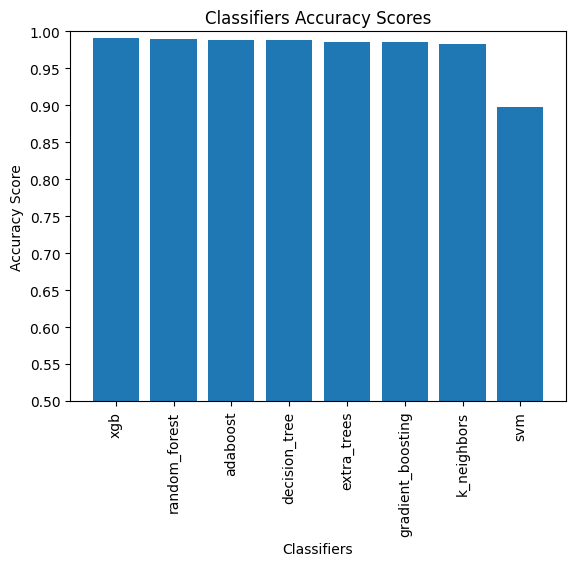

xgb: 0.9912583182093162
random_forest: 0.9895644283121596
adaboost: 0.9878100423472473
decision_tree: 0.9878100423472473
extra_trees: 0.9860556563823353
gradient_boosting: 0.9860556563823352
k_neighbors: 0.9825166364186328
svm: 0.8972171808832424


In [31]:
pm_uTest.plot_classifier_acc()

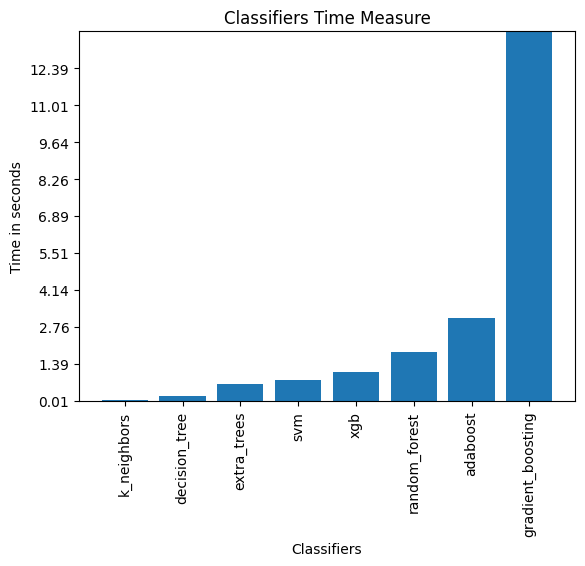

k_neighbors: 0.04125785827636719
decision_tree: 0.19235467910766602
extra_trees: 0.6378984451293945
svm: 0.8064432144165039
xgb: 1.0842499732971191
random_forest: 1.831819772720337
adaboost: 3.086982488632202
gradient_boosting: 13.750046491622925


In [32]:
pm_uTest.plot_classifier_time()

Ensemble

lasso

In [33]:
ens_lasso = ensemble.Ensemble(X, y, features=lasso_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [34]:
pm_ens_lasso = performanceMetrics.PerformanceMetrics(ens_lasso)
pm_ens_lasso.all_metrics()

["ACC: {'voting': 0.9913188142770719, 'bagging': 0.994736842105263, 'stacking': 0.9895946763460375}"]

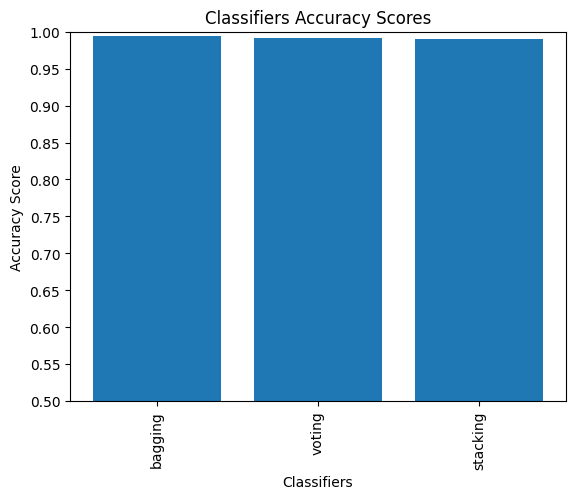

bagging: 0.994736842105263
voting: 0.9913188142770719
stacking: 0.9895946763460375


In [35]:
pm_ens_lasso.plot_classifier_acc()

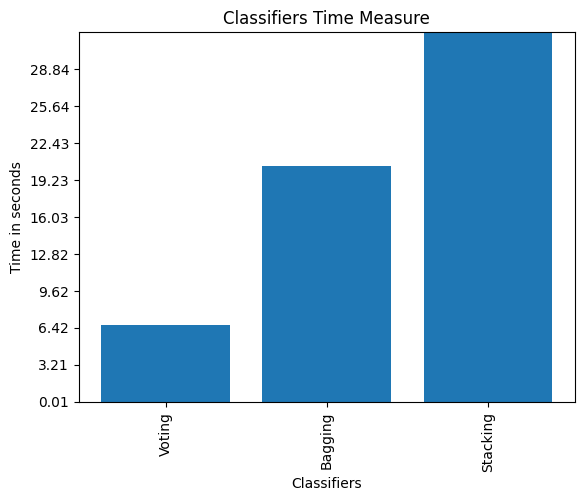

Voting: 6.64203405380249
Bagging: 20.42179250717163
Stacking: 32.032816648483276


In [36]:
pm_ens_lasso.plot_classifier_time()

relieff

In [37]:
ens_relieff = ensemble.Ensemble(X, y, features=relieff_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [38]:
pm_ens_relieff = performanceMetrics.PerformanceMetrics(ens_relieff)
pm_ens_relieff.all_metrics()

["ACC: {'voting': 0.9877495462794919, 'bagging': 0.9895039322444041, 'stacking': 0.9877495462794919}"]

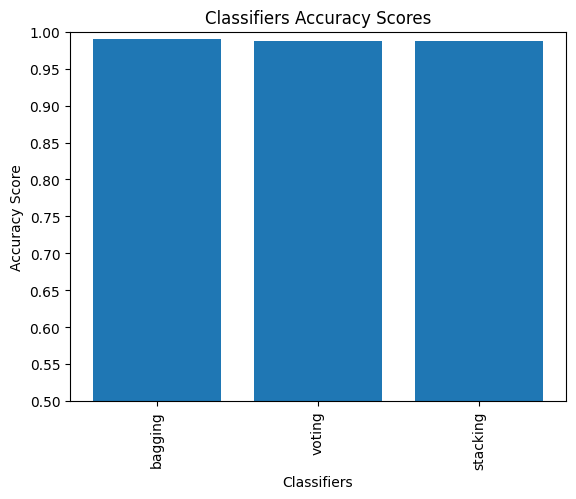

bagging: 0.9895039322444041
voting: 0.9877495462794919
stacking: 0.9877495462794919


In [39]:
pm_ens_relieff.plot_classifier_acc()

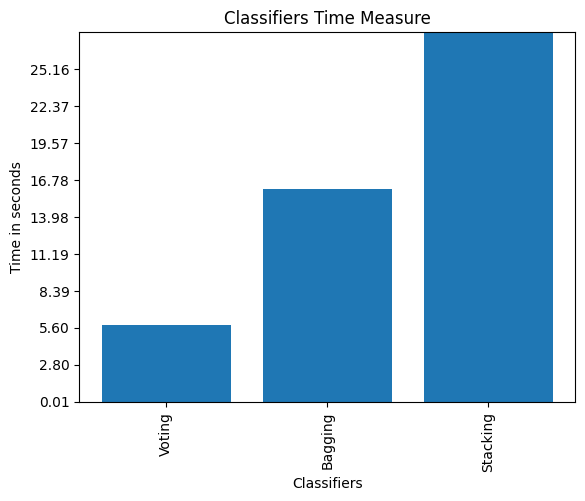

Voting: 5.832622289657593
Bagging: 16.11629056930542
Stacking: 27.94558048248291


In [40]:
pm_ens_relieff.plot_classifier_time()

mrmr

In [41]:
ens_mrmr = ensemble.Ensemble(X, y, features=mrmr_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [42]:
pm_ens_mrmr = performanceMetrics.PerformanceMetrics(ens_relieff)
pm_ens_mrmr.all_metrics()

["ACC: {'voting': 0.9877495462794919, 'bagging': 0.9895039322444041, 'stacking': 0.9877495462794919}"]

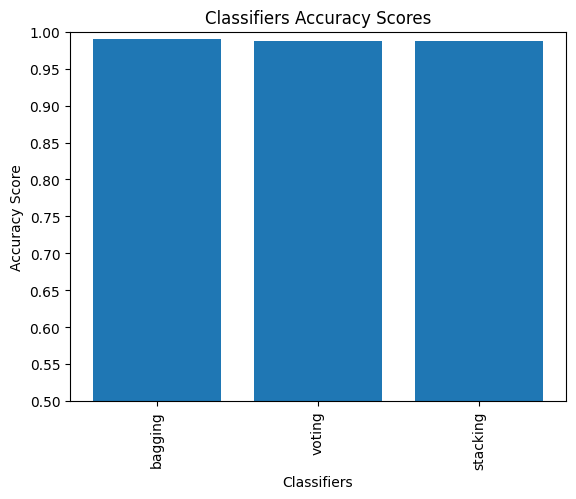

bagging: 0.9895039322444041
voting: 0.9877495462794919
stacking: 0.9877495462794919


In [43]:
pm_ens_mrmr.plot_classifier_acc()

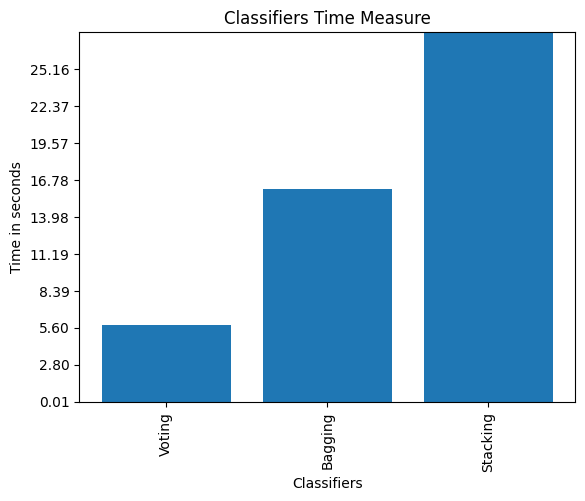

Voting: 5.832622289657593
Bagging: 16.11629056930542
Stacking: 27.94558048248291


In [44]:
pm_ens_mrmr.plot_classifier_time()

uTest

In [45]:
ens_uTest = ensemble.Ensemble(X, y, features=uTest_features, ensemble=['all'], classifiers=['adaboost', 'random_forest', 'xgb'], cross_validation='stratified_k_fold', fold=10) 

In [46]:
pm_ens_uTest = performanceMetrics.PerformanceMetrics(ens_uTest)
pm_ens_uTest.all_metrics()

["ACC: {'voting': 0.9895644283121596, 'bagging': 0.9930127041742287, 'stacking': 0.989534180278282}"]

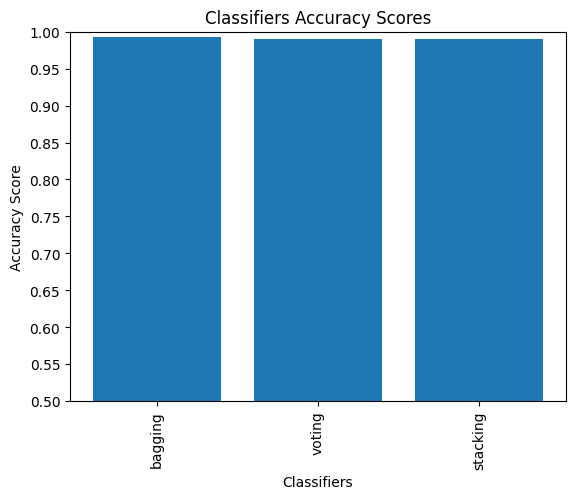

bagging: 0.9930127041742287
voting: 0.9895644283121596
stacking: 0.989534180278282


In [47]:
pm_ens_uTest.plot_classifier_acc()

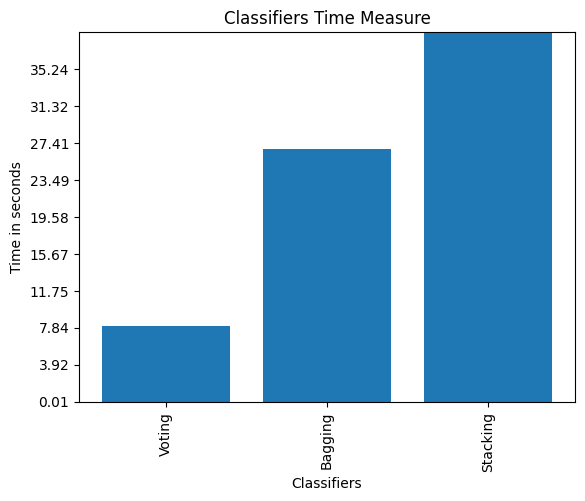

Voting: 8.055107593536377
Bagging: 26.728930950164795
Stacking: 39.13917279243469


In [48]:
pm_ens_uTest.plot_classifier_time()